In [55]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
import math
from tqdm import tqdm_notebook
import re
import seaborn as sn
from scipy.sparse import lil_matrix, csr_matrix
from collections import Counter

In [56]:
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you","youu","youuu", "your", "yours", "yourself", "yourselves", 
             "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", 
             "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", 
             "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", 
             "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", 
             "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", 
             "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", 
             "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [57]:
data=pd.read_csv("train.csv")

In [58]:
data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [59]:
data['tweet'][0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [60]:
y_value_counts=data['label'].value_counts()
print("Negative tweets  = ",y_value_counts[1], "with percentage ", (y_value_counts[1]*100)/(y_value_counts[0]+y_value_counts[1]),'%')
print("Positive tweets  = ",y_value_counts[0], "with percentage ", (y_value_counts[0]*100)/(y_value_counts[0]+y_value_counts[1]),'%')

Negative tweets  =  2242 with percentage  7.014579813528565 %
Positive tweets  =  29720 with percentage  92.98542018647143 %


In [61]:
data['tweet']=data['tweet'].str.replace(' ','_')
data['tweet']=data['tweet'].str.replace('-','_')
data['tweet']=data['tweet'].str.lower()

In [62]:
def expand(sent):
    "This function will replace english short notations with full form"
    
    sent=re.sub(r"can't", "can not",sent)
    sent=re.sub(r"won't", "will not",sent)
    
    sent=re.sub(r"n\'t", " not",sent)
    sent=re.sub(r"\'re", " are",sent)
    sent=re.sub(r"\'m"," am",sent)
    sent=re.sub(r"\'s"," is",sent)
    sent=re.sub(r"\'ll"," will",sent)
    sent=re.sub(r"\'ve"," have",sent)
    sent=re.sub(r"\'d"," would",sent)
    sent=re.sub(r"\'t", " not",sent)
    
    return sent
    

In [63]:
def preprocess_tweet(text):
    "function for preprocess the text data"
    
    preprocessed_tweet=[]
    
    for sentence in tqdm_notebook(text):
        sent=expand(sentence)
        sent=sent.replace("\\r"," ")
        sent=sent.replace("\\n"," ")
        sent=sent.replace('\\"'," ")
        sent=re.findall("[a-z0-9]+",sentence.lower())
        
        sent=" ".join(i for i in sent if i.lower() not in stopwords)
        preprocessed_tweet.append(sent.lower().strip())
        
    return preprocessed_tweet
        

In [64]:
data['tweet'][0]

'_@user_when_a_father_is_dysfunctional_and_is_so_selfish_he_drags_his_kids_into_his_dysfunction.___#run'

In [65]:
preprocessed_tweets=preprocess_tweet(data['tweet'].values)

<ipython-input-63-579385195985>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sentence in tqdm_notebook(text):


In [66]:
data['tweet']=preprocessed_tweets

In [67]:
data['tweet'][31959]

'listening sad songs monday morning otw work sad'

In [68]:
vocabulary = []
for i in tqdm_notebook(data['tweet']):
    for k in i.split(' '):
        vocabulary.append(k)

<ipython-input-68-682c8cc50988>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(data['tweet']):


In [69]:
counter = Counter(vocabulary)
top10 = counter.most_common(10)

In [70]:
xaxes = [i[1] for i in top10]
yaxes = [i[0] for i in top10]

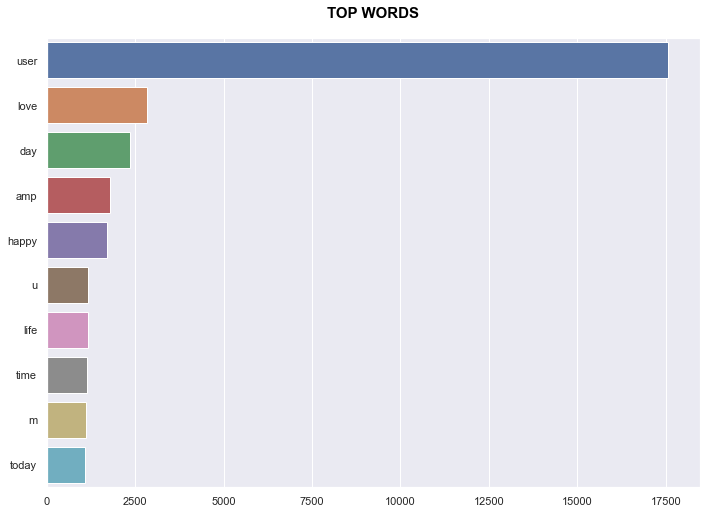

No handles with labels found to put in legend.


In [71]:
# sn.set(font_scale=1.5)
sn.set_style('whitegrid');
sn.set(rc={'figure.figsize':(11.7,8.27)})
ax=sn.barplot(x=xaxes, y=yaxes);
ax.set_title('TOP WORDS',loc='center', pad=20, fontdict={'fontsize': 15,
        'fontweight': 'bold',
        'color': 'black',
        'verticalalignment': 'baseline',
        });
# ax.set(xlabel='Tweets Sentiments', ylabel='No. of Tweets');
plt.show()
ax.legend()
ax.figure.savefig('top10wordscount.png',pad_inches=5)

In [72]:
print(len(vocabulary))
VOC = set(vocabulary)
VOC = list(VOC)
print(len(VOC))

274346
38961


In [73]:
c = len(VOC)
r = len(data)
M = csr_matrix((r, c), dtype = np.bool).toarray()

In [74]:
VOC_ind = {}
for i in range(len(VOC)):
  VOC_ind[VOC[i]] = i

In [75]:
i = 0
for j in tqdm_notebook(data['tweet']):
  for k in j.split(' '):
    M[i][VOC_ind[k]] = True
  i += 1

<ipython-input-75-1d2562a53999>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tqdm_notebook(data['tweet']):


In [76]:
x_train,x_test,y_train,y_test=train_test_split(M,data['label'],test_size=0.3,stratify=data['label'])

In [77]:
class NBC:
  def __init__(self):
    self.lc1 = 1
    self.lc0 = 1
    self.e = 1
    self.p0 = 1
    self.p1 = 1
  
  def predict(self,x, LC = False):
    y_pred = []
    e1 = self.lc1
    e0 = self.lc0
    if LC:
      e1 = self.lc1 + (self.e*len(self.probability_1))
      e0 = self.lc0 + (self.e*len(self.probability_0))
    for i in tqdm_notebook(x):
      r = 1
      nr = 1
      for k in range(len(i)):
        if i[k]:
          if LC:
            r *= (self.probability_1[k]+1)/e1
            nr *= (self.probability_0[k]+1)/e0
          else:
            r *= self.probability_1[k]/e1
            nr *= self.probability_0[k]/e0
      r *= self.p1
      nr *= self.p0
      if r > nr:
        y_pred.append(1)
      else:
        y_pred.append(0)
    return y_pred
  
  def fit(self, X, Y):
    # 2 output classes 1. Rasist (1)
    #                  2. Not Rasist (0)
    self.probability_0 = X.sum(axis=0)
    self.n = len(X)
    self.probability_1 = [0]*len(self.probability_0)
    for i,j in zip(X,Y):
      if j == 1:
        for k in range(len(i)):
          if i[k]:
            self.probability_1[k] += 1
            self.probability_0[k] -= 1
    self.probability_1 = np.array(self.probability_1)
    self.lc1 = np.sum(self.probability_1)
    self.lc0 = np.sum(self.probability_0)
    self.p1 = Y.sum()/len(Y)
    self.p0 = 1-self.p1
    # self.probability_1 = [x / r for x in self.probability_1]
    # self.probability_0 = [x / nr for x in self.probability_0]
    return 
  
  def find(self,a,n):
    b = 1.96*math.sqrt((a*(1-a)/n))
    print("\t\t" + "%.3f"%(a*100) + " +/- " + "%.3f"%(b*100))
    # a1 = (a + ((1.96*1.96)/(2*n)))/(1 + ((1.96*1.96)/(n)))
    # b1 = 1.96*math.sqrt((a*(1-a)/(n+4)))
    # print("\t\t" + "%.3f"%(a1*100) + " +/- " + "%.3f"%(b1*100))
  
  def info(self, X, Y,LC = False):
    n = len(X)
    if LC:
      y_pred = self.predict(X, LC = True)
      print("With laplace correction")
    else:
      y_pred = self.predict(X)
      print("without laplace correction")
    acc = accuracy_score(Y,y_pred)
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i,j in zip(Y, y_pred):
      if i==1 and j == 1:
        TP += 1
      elif i == 1 and j == 0:
        FN += 1
      elif i == 0 and j == 1:
        FP += 1
      else:
        TN += 1
    sensitivity = TP/(TP + FN)
    specificity = TN / (TN + FP)
    precision = TP /(TP + FP)
    f_score = 2 * (precision*sensitivity/(precision + sensitivity))
    print("\taccuracy : ")
    self.find(acc,n)
    print("\tprecision = ")
    self.find(precision,n)
    print("\tf-score = ")
    self.find(f_score,n)
    print("\tsensitivity = ")
    self.find(sensitivity,n)
    print("\tspecificity = ")
    self.find(specificity,n)
    print("true positives : ",TP)
    print("false positives : ",FP)
    print("true negatives : ",TN)
    print("false negatives : ",FN)
    

In [78]:
nbc = NBC()
nbc.fit(X = x_train, Y = y_train)

In [79]:
nbc.info(X = x_test, Y = y_test, LC = False)

<ipython-input-77-dd73cc4cf121>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(x):



without laplace correction
	accuracy : 
		94.817 +/- 0.444
	precision = 
		80.137 +/- 0.799
	f-score = 
		48.497 +/- 1.000
	sensitivity = 
		34.770 +/- 0.953
	specificity = 
		99.349 +/- 0.161
true positives :  234
false positives :  58
true negatives :  8858
false negatives :  439


In [80]:
nbc.info(X = x_test, Y = y_test, LC = True)

<ipython-input-77-dd73cc4cf121>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(x):



With laplace correction
	accuracy : 
		94.848 +/- 0.442
	precision = 
		65.674 +/- 0.950
	f-score = 
		60.289 +/- 0.979
	sensitivity = 
		55.721 +/- 0.994
	specificity = 
		97.802 +/- 0.293
true positives :  375
false positives :  196
true negatives :  8720
false negatives :  298
